## **Introduction to Image Processing**

## Interpolation and Blending

 Importing necessary libraries/modules and functions

In [15]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned ON


### ** Resizing an image size using different interpolation functions**

**1. ** Resize the lena or vibot image using nearest, bilinear and bicubic function.

You can define your function which accept the model and resize size from the user or just run a script.

In [28]:

def RESIZE(img, factor):
    
   
    fig = plt.figure()

    #nearest neighbour 
    img_nearest = misc.imresize(img, factor, 'nearest')
    im1 = fig.add_subplot(1,3,1)
    im1.imshow(img_nearest)
    im1.set_title('Nearest')

    #bilinear
    img_bilinear = misc.imresize(img, factor, 'bilinear')
    im2 = fig.add_subplot(1,3,2)
    im2.imshow(img_bilinear)
    im2.set_title('Bilinear')

    #bicubic
    img_bicubic = misc.imresize(img, factor, 'bicubic')
    im3 = fig.add_subplot(1,3,3)
    im3.imshow(img_bicubic)
    im3.set_title('Bicubic')

    return img_nearest, img_bilinear, img_bicubic



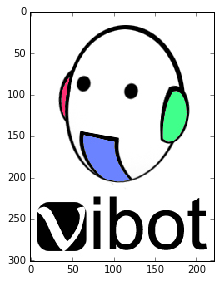

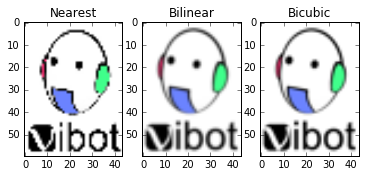

In [30]:
l_g = io.imread('./images/vibot-color.jpg')
io.imshow(l_g)
 
img_vibot_resize = RESIZE(l_g, 20) 

**2. ** Similar to the function of `my_blending.m` that you saw before define your function of blending.

Blend the lena image and vibot image using simple, alpha and pyramid method.   

Pyramid blending method: 
1. Create a mask the same size as your input images 
2. Create Laplacian pyramid of the input images 
    2.1. Create Gaussian pyramids of the input images
    2.2. Create Laplacian pyramids using the Gaussian pyramids
3. Create Gaussian pyramid for the region mask
4. Blend the two laplacian pyramids using the pyramid of the mask as weigh 
    $$ BL = L_1 * (GM) + L_2 *(1 - GM)$$
5. Colapse the pyramid to get the final image 
    $$rescale(rescale(rescale(BL_3)+BL_2)+BL_1)+BL_0$$

Note : For pyramid blending approach, you can use:
    * transform.rescale for upscaling your images
    * transform.pyramid_gaussian for building your pyramids
    * The output of transform.pyramid_gaussian is a type generator and you need to convert it to a list :
    
        b = [a for a in Gaussian_pyramid]


In [70]:

def blend_Simple(image1,image2):
   

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)
    
    img_out = np.zeros(image1.shape)
    img_out[:, 0: img_out.shape[1]/2] =  image1[:, 0:image1.shape[1]/2]
    img_out[:, img_out.shape[1]/2:img_out.shape[1]] =  image2[:, image1.shape[1]/2:image1.shape[1]]
    return img_out








Use the `orange.jpeg` and `apple.jpeg` imgages and blend them using simple, alpha and pyramid approach.

In [73]:
def blend_Alpha(image1,image2):
   

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)
    
    alpha_window = 50
    alpha_image = np.zeros((image1.shape[0],alpha_window*2,3))
    
    #Creating the mask, and initializing it with values ranging from 0 to 1, with a 
    #step-size of twice the width of the desired mask 
    
    alpha_image[:,:,0] = alpha_image[:,:,1] = alpha_image[:,:,2] = \
        np.tile(np.linspace(0, 1, alpha_window*2, endpoint=True), (image1.shape[0],1))

    #First, we will perform Simple Blending
    im_out = blendSimple(image1,image2)

    #Now, we will fill the masked region in the center to acheive Alpha Blending
    im_out[:, int(im_out.shape[1]/2)-alpha_window:int(im_out.shape[1]/2)+alpha_window] = \
    image1[:, int(im_out.shape[1]/2)-alpha_window:int(im_out.shape[1]/2)+alpha_window]*(1-alpha_image) + \
    image2[:, int(im_out.shape[1]/2)-alpha_window:int(im_out.shape[1]/2)+alpha_window]*alpha_image 

    return im_out



#1. Create a mask the same size as your input images 
#2. Create Laplacian pyramid of the input images 
#2.1. Create Gaussian pyramids of the input images 
#2.2. Create Laplacian pyramids using the Gaussian pyramids
#3. Create Gaussian pyramid for the region mask
#4. Blend the two laplacian pyramids using the pyramid of the mask as weigh  
#5. Colapse the pyramid to get the final image 
# transform.rescale for upscaling your images
# transform.pyramid_gaussian for building your pyramids
# The output of transform.pyramid_gaussian is a type generator and you need to convert it to a list :

 #   b = [a for a in Gaussian_pyramid]




Show the your answers.

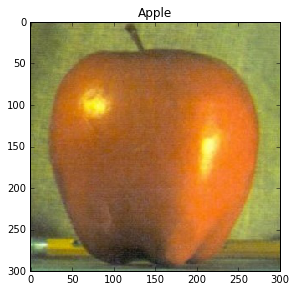

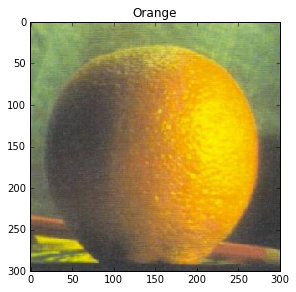

C:\Users\Omair Khalid\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Omair Khalid\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


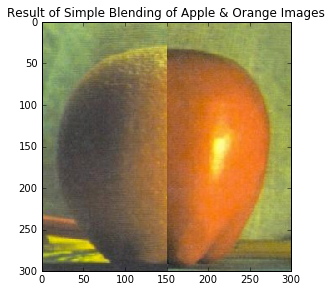

C:\Users\Omair Khalid\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


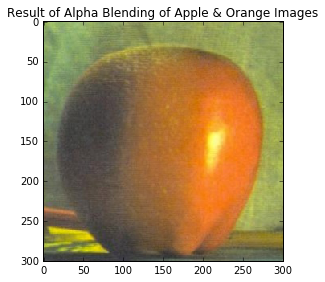

In [74]:
img_orange = io.imread("./images/orange.jpeg")
img_apple =  io.imread("./images/apple.jpeg")
io.imshow(img_apple)
plt.title('Apple')
io.show()
io.imshow(img_orange)
plt.title('Orange')
io.show()

blend_simple_out = blend_Simple(img_orange,img_apple);
io.imshow(blend_simple_out);
plt.title('Result of Simple Blending of Apple & Orange Images')


io.show()

im_blend_alpha = blend_Alpha(img_orange, img_apple)
plt.title("Result of Alpha Blending of Apple & Orange Images")
io.imshow(im_blend_alpha)

NameError: name 'img1' is not defined

In [85]:
img1 = img_orange
img2 = img_apple

#Creating Mask

mask = np.ones((img1.shape[0], img2.shape[1]))
mask[:, int(img1.shape[1]/2):] = mask[:, int(img1.shape[1]/2):] - 1.0

mask_depth = np.zeros((mask.shape[0], mask.shape[1], 3))
mask_depth[:,:,0] = mask_depth[:,:,1] = mask_depth[:,:,2] = mask




[[ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 ..., 
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]]
